In [2]:
import imageio.v2 as imageio
import os 
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
from PIL import Image
import matplotlib as mpl
import seaborn as sns
from shapely.geometry import MultiPolygon
import numpy as np
import re
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point 

#### Bird Migration Presence from June 15th to July 15th GIF

<Axes: >

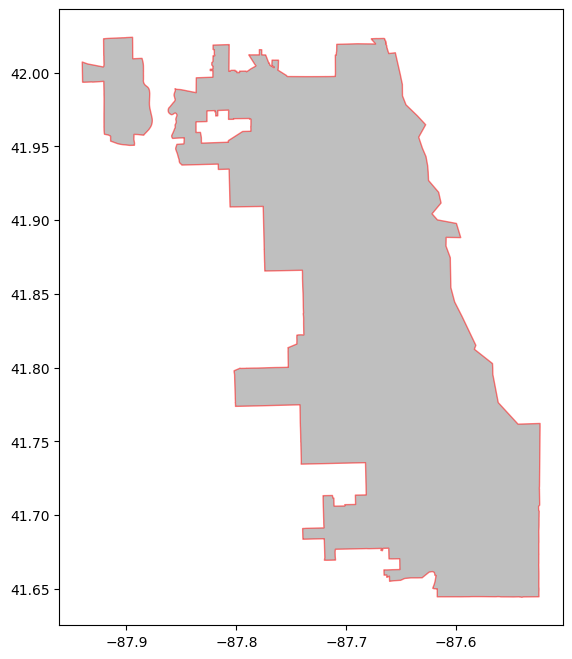

In [3]:
chicago_boundary = gpd.read_file("Chicago_Tracts_2010.zip")
multipolygon = chicago_boundary.dissolve(by=None)
fig, ax = plt.subplots(figsize=(8, 8))
multipolygon.plot(ax=ax, color='grey', edgecolor='red', alpha=0.5)

In [ ]:
test = gpd.read_file("30d_bird_chicago/2025-07-15_bird_data.zip")
fig, ax = plt.subplots(figsize=(8, 10))

test.plot(ax=ax, edgecolor='grey', legend=True)

multipolygon.boundary.plot(ax=ax, color='black')

plt.title("(Test) Bird Migration Presence on 2025-07-15", fontsize=16)

In [ ]:
## making the frames for the gif:
bird_presence_path = "./30d_bird_chicago"
frames_path = "bird_presence_frames"

os.makedirs(frames_path, exist_ok=True)

for daily_data in os.listdir(bird_presence_path):
    full_path = os.path.join(bird_presence_path, daily_data)

    gdf = gpd.read_file(full_path)

    fig, ax = plt.subplots(figsize=(8, 10))
    gdf.plot(ax=ax, color="red", edgecolor='grey', legend=True)
    multipolygon.boundary.plot(ax=ax, color='black')

    date = os.path.splitext(daily_data)[0][:10]
    plt.title(f"Migratory Birds Presence on {date}", fontsize=16)

    save_path = os.path.join(frames_path, f"bird_migration_presence_{date}.png")

    plt.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.close()

In [ ]:
## creating the gif with the generated frames: 
gif_path = "bird_presence_animation.gif"

frames = [Image.open(os.path.join(frames_path, f)) for f in os.listdir(frames_path)]
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=500, loop=0)

#### Bird Migration Hot Spot Density from June 15th to July 15th GIF

fix: keep legend normalized 

In [ ]:
## fix -> max not displaying/ being overwritten

gdf = gpd.read_file("./30d_bird_chicago/2025-06-18_bird_data.zip")

vmin = gdf["howMany"].min()
vmax = gdf["howMany"].max()

gdf
# max entries have double or more entries which overwrites the max val
# from locid keep the entries with max "howMany" value

gdf = gdf.loc[gdf.groupby('locId')['howMany'].idxmax()].reset_index(drop=True)
gdf

In [ ]:
## making hotspot density maps for gif:
bird_presence_path = "./30d_bird_chicago"
hotspot_frames_path = "bird_hotspot_d_frames"

os.makedirs(hotspot_frames_path, exist_ok=True)

for daily_data in os.listdir(bird_presence_path):
    full_path = os.path.join(bird_presence_path, daily_data)

    gdf = gpd.read_file(full_path)
    gdf["howMany"] = gdf["howMany"].fillna(1)
    gdf = gdf.loc[gdf.groupby('locId')['howMany'].idxmax()].reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(8, 10)) 

    vmin = gdf["howMany"].min()
    vmax = gdf["howMany"].max()
    
    gdf_plot = gdf.plot(
        column="howMany",
        ax=ax,
        cmap="coolwarm",
        legend=False
    )

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = mpl.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm._A = []

    cbar = fig.colorbar(
        sm,
        ax=ax,
        fraction=0.04,
        pad=0.02,
        aspect=20,
        shrink=0.4
    )
    cbar.set_label("Bird Abundance", fontsize=9)
    cbar.ax.tick_params(labelsize=8)
    cbar.set_ticks([vmin, round((vmin + vmax) / 2), vmax])

    multipolygon.boundary.plot(ax=ax, color='black')

    date = os.path.splitext(daily_data)[0][:10]
    plt.title(f"Migratory Birds Presence on {date}", fontsize=16)

    save_path = os.path.join(hotspot_frames_path, f"bird_hotspot_density_{date}.png")

    plt.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.close()

In [ ]:
## creating the gif with the generated frames: 
gif_path = "bird_hotspot_d_animation.gif"

frames = [Image.open(os.path.join(hotspot_frames_path, f)) for f in os.listdir(hotspot_frames_path)]
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=900, loop=0)

#### SHAP Plot GIF

In [ ]:
## creating the gif with the generated frames: 
shap_plot_frames = "shap_plots"
shap_gif_path = "shap_feature_importance.gif"

# re order the frames according to date first: 
# date_pattern = re.compile(r"(\d{2}_[A-Z]{3})")

# png_files = []
# for filename in os.listdir(shap_plot_frames):
#     if filename.endswith(".png"):
#         match = date_pattern.search(filename)
#         if match:
#             date_str = match.group(1)
#             try:
#                 date_obj = datetime.datetime.strptime(date_str, "%d_%b")
#                 png_files.append((filename, date_obj))
#             except ValueError:
#                 print(f"Skipping invalid date in: {filename}")

# png_files.sort(key=lambda x: x[1])

# for i, (filename, date_obj) in enumerate(png_files, start=1):
#     old_path = os.path.join(shap_plot_frames, filename)
#     new_filename = f"{i:03d}_{filename}"
#     new_path = os.path.join(shap_plot_frames, new_filename)
#     os.rename(old_path, new_path)
#     print(f"Renamed: {filename} --> {new_filename}")

In [ ]:
frames = [Image.open(os.path.join(shap_plot_frames, f)) for f in os.listdir(shap_plot_frames)]
frames[0].save(shap_gif_path, save_all=True, append_images=frames[1:], duration=500, loop=0)

### Per-tract Bird Density plotting:

using the chicago ct point csv:
- 798 unique tracts
- each tract has the avg daily density data for each of the 31 days
- I will plot -> 15_JUN data for each tract, as it should be different for all 798 tracts. 

In [46]:
gdf = gpd.read_file("Chicago_CT_Point.csv")

In [47]:
target_vars = ['15_JUN',
       '16_JUN', '17_JUN', '18_JUN', '19_JUN', '20_JUN', '21_JUN', '22_JUN',
       '23_JUN', '24_JUN', '25_JUN', '26_JUN', '27_JUN', '28_JUN', '29_JUN',
       '30_JUN', '01_JLY', '02_JLY', '03_JLY', '04_JLY', '05_JLY', '06_JLY',
       '07_JLY', '08_JLY', '09_JLY', '10_JLY', '11_JLY', '12_JLY', '13_JLY',
       '14_JLY', '15_JLY']

In [48]:
gdf["Long"] = pd.to_numeric(gdf["Long"])
gdf["Lat"] = pd.to_numeric(gdf["Lat"])
gdf["TRACTCE10"] = pd.to_numeric(gdf["TRACTCE10"])

print(gdf.dtypes[:6])

TRACTCE10     float64
GEOID10        object
NAME10         object
NAMELSAD10     object
Long          float64
Lat           float64
dtype: object


In [49]:
gdf['geometry'] = gdf.apply(lambda row: Point(row['Long'], row['Lat']), axis=1)
gdf = gpd.GeoDataFrame(gdf, geometry='geometry', crs="EPSG:4326")
gdf = gdf.rename(columns={"geometry":"geometry_ct_point"})
gdf[gdf["Communit_1"]=="OHARE"]

,TRACTCE10,GEOID10,NAME10,NAMELSAD10,Long,Lat,GEOID_Matc,State,County,Community,...,07_JLY,08_JLY,09_JLY,10_JLY,11_JLY,12_JLY,13_JLY,14_JLY,15_JLY,geometry_ct_point
385,760801.0,17031760800.000000,7608.010000,Census Tract 7608.01,-87.844847,41.983485,17031760800.000000,ILLINOIS,Cook,76.000000,...,-0.89844700000,-0.43046500000,0.21178800000,-0.55871700000,-0.39030700000,-0.54116900000,-0.35668400000,-1.14376000000,0.04618820000,POINT (-87.84485 41.98348)
386,760801.0,17031760800.000000,7608.010000,Census Tract 7608.01,-87.844847,41.983485,17031760800.000000,ILLINOIS,Cook,76.000000,...,-0.89844700000,-0.43046500000,0.21178800000,-0.55871700000,-0.39030700000,-0.54116900000,-0.35668400000,-1.14376000000,0.04618820000,POINT (-87.84485 41.98348)
387,760802.0,17031760800.000000,7608.020000,Census Tract 7608.02,-87.847217,41.957832,17031760800.000000,ILLINOIS,Cook,76.000000,...,-0.85400600000,-0.33581800000,0.12978100000,-0.51304500000,-0.50155100000,-0.48888500000,-0.33815400000,-1.19502000000,-0.06623270000,POINT (-87.84722 41.95783)
388,760803.0,17031760800.000000,7608.030000,Census Tract 7608.03,-87.844155,41.975346,17031760800.000000,ILLINOIS,Cook,76.000000,...,-0.88676900000,-0.59563600000,-0.01962440000,-0.50018300000,0.31978400000,-0.62882100000,-0.33150500000,-1.17326000000,0.23225600000,POINT (-87.84416 41.97535)
389,770902.0,17031770900.000000,7709.020000,Census Tract 7709.02,-87.836184,41.970066,17031770900.000000,ILLINOIS,Cook,76.000000,...,-0.85780000000,-0.43614400000,-0.06252610000,-0.48333000000,0.60850200000,-0.60670000000,-0.34029700000,-1.21767000000,0.19436400000,POINT (-87.83618 41.97007)
799,760802.0,17031760800.000000,7608.020000,Census Tract 7608.02,-87.847217,41.957832,17031760800.000000,ILLINOIS,Cook,76.000000,...,-0.85400600000,-0.33581800000,0.12978100000,-0.51304500000,-0.50155100000,-0.48888500000,-0.33815400000,-1.19502000000,-0.06623270000,POINT (-87.84722 41.95783)


In [50]:
chicago_tracts = gpd.read_file("Chicago_Tracts_2010.zip")

In [51]:
chicago_tracts["tractce10"] = pd.to_numeric(chicago_tracts["tractce10"])
chicago_tracts.dtypes

statefp10       object
countyfp10      object
tractce10        int64
geoid10         object
name10          object
namelsad10      object
commarea        object
commarea_n     float64
notes           object
geometry      geometry
dtype: object

In [52]:
# Convert gdf TRACTCE10 from float to int to string, pad with zeros
gdf["TRACTCE10"] = gdf["TRACTCE10"].astype(int).astype(str).str.zfill(6)

# Convert chicago_tracts tractce10 to string and pad
chicago_tracts["tractce10"] = chicago_tracts["tractce10"].astype(str).str.zfill(6)

In [53]:
# Replace specific values
chicago_tracts.loc[chicago_tracts["tractce10"] == "980000", "tractce10"] = "760802"
chicago_tracts.loc[chicago_tracts["tractce10"] == "770602", "tractce10"] = "760801"

In [54]:
# merge w/chicago_tracts_2010 to get geometry col 
# merge on "TRACTCE10"

gdf_merged = pd.merge(gdf, chicago_tracts, left_on="TRACTCE10", right_on="tractce10", how="inner")

In [55]:
gdf_merged = gdf_merged.drop(columns=["notes"],axis=1)
gdf_merged[gdf_merged["Communit_1"]=="OHARE"].isna().sum()

TRACTCE10            0
GEOID10              0
NAME10               0
NAMELSAD10           0
Long                 0
Lat                  0
GEOID_Matc           0
State                0
County               0
Community            0
Communit_1           0
15_JUN               0
16_JUN               0
17_JUN               0
18_JUN               0
19_JUN               0
20_JUN               0
21_JUN               0
22_JUN               0
23_JUN               0
24_JUN               0
25_JUN               0
26_JUN               0
27_JUN               0
28_JUN               0
29_JUN               0
30_JUN               0
01_JLY               0
02_JLY               0
03_JLY               0
04_JLY               0
05_JLY               0
06_JLY               0
07_JLY               0
08_JLY               0
09_JLY               0
10_JLY               0
11_JLY               0
12_JLY               0
13_JLY               0
14_JLY               0
15_JLY               0
geometry_ct_point    0
statefp10  

In [56]:
gdf_merged = gpd.GeoDataFrame(gdf_merged, geometry="geometry", crs="EPSG:4326")
type(gdf_merged)

geopandas.geodataframe.GeoDataFrame

In [57]:
gdf_merged.shape

(805, 52)

#### THE TRACTS THAT ARE MISSING ARE: 17031770602, 17031980000 (from chicago tracts 2010)

<hr class="white-line">

In [58]:
def format_date(col_name):
    """Convert column names like '15_JUN' or '01_JLY' to 'June 15, 2025'."""
    clean_name = col_name.strip().replace(',', '').upper()
    day, month = clean_name.split('_')

    # Only correct JLY → JUL
    if month == "JLY":
        month = "JUL"

    date_str = f"{day}_{month}_2025"
    dt = datetime.strptime(date_str, "%d_%b_%Y")
    return dt.strftime("%B %#d, %Y")  # Use %#d on Windows

In [59]:
print(chicago_tracts.dtypes)
print(gdf.dtypes)

statefp10       object
countyfp10      object
tractce10       object
geoid10         object
name10          object
namelsad10      object
commarea        object
commarea_n     float64
notes           object
geometry      geometry
dtype: object
TRACTCE10              object
GEOID10                object
NAME10                 object
NAMELSAD10             object
Long                  float64
Lat                   float64
GEOID_Matc             object
State                  object
County                 object
Community              object
Communit_1             object
15_JUN                 object
16_JUN                 object
17_JUN                 object
18_JUN                 object
19_JUN                 object
20_JUN                 object
21_JUN                 object
22_JUN                 object
23_JUN                 object
24_JUN                 object
25_JUN                 object
26_JUN                 object
27_JUN                 object
28_JUN                 object
29_JUN

In [62]:
bird_density_frames = "bird_density_frames"
for target in target_vars: 
    fig, ax = plt.subplots(figsize=(8, 10)) 
    gdf_merged[target] = pd.to_numeric(gdf_merged[target])

    gdf_merged.plot(
        column=target,
        ax=ax,
        cmap="RdPu",
        legend=False,
        linewidth=0.5,
        edgecolor="black",
    )

    vmin = gdf_merged[target].min()
    vmax = gdf_merged[target].max()

    # add a smaller colorbar manually
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = mpl.cm.ScalarMappable(cmap="RdPu", norm=norm)
    sm._A = []

    # create colorbar with fewer ticks
    cbar = fig.colorbar(
        sm,
        ax=ax,
        fraction=0.04,
        pad=0.02,
        aspect=20,
        shrink=0.4
    )
    cbar.set_label("Getis-Ord Gi* Intensity", fontsize=9)
    cbar.ax.tick_params(labelsize=8)
    cbar.set_ticks([vmin, (vmin + vmax) / 2, vmax])

    date = format_date(target)

    ax.set_title(f"Migratory Birds Hot-Spot Intensity on {date}", fontsize=14)
    plt.tight_layout()

    save_path = os.path.join(bird_density_frames, f"bird_density_{date}.png")

    plt.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.close()

In [63]:
date_pattern = re.compile(r"([A-Za-z]+ \d{1,2}, \d{4})")

# put frames in order based on date
png_files = []
for filename in os.listdir(bird_density_frames):
    if filename.endswith(".png"):
        match = date_pattern.search(filename)
        if match:
            date_str = match.group(1)
            try:
                date_obj = datetime.strptime(date_str, "%B %d, %Y")
                png_files.append((filename, date_obj))
            except ValueError:
                print(f"Skipping invalid date in: {filename}")

png_files.sort(key=lambda x: x[1])

for i, (filename, date_obj) in enumerate(png_files, start=1):
    old_path = os.path.join(bird_density_frames, filename)
    new_filename = f"{i:03d}_{filename}"
    new_path = os.path.join(bird_density_frames, new_filename)
    os.rename(old_path, new_path)
    print(f"Renamed: {filename} --> {new_filename}")

Renamed: bird_density_June 15, 2025.png --> 001_bird_density_June 15, 2025.png
Renamed: bird_density_June 16, 2025.png --> 002_bird_density_June 16, 2025.png
Renamed: bird_density_June 17, 2025.png --> 003_bird_density_June 17, 2025.png
Renamed: bird_density_June 18, 2025.png --> 004_bird_density_June 18, 2025.png
Renamed: bird_density_June 19, 2025.png --> 005_bird_density_June 19, 2025.png
Renamed: bird_density_June 20, 2025.png --> 006_bird_density_June 20, 2025.png
Renamed: bird_density_June 21, 2025.png --> 007_bird_density_June 21, 2025.png
Renamed: bird_density_June 22, 2025.png --> 008_bird_density_June 22, 2025.png
Renamed: bird_density_June 23, 2025.png --> 009_bird_density_June 23, 2025.png
Renamed: bird_density_June 24, 2025.png --> 010_bird_density_June 24, 2025.png
Renamed: bird_density_June 25, 2025.png --> 011_bird_density_June 25, 2025.png
Renamed: bird_density_June 26, 2025.png --> 012_bird_density_June 26, 2025.png
Renamed: bird_density_June 27, 2025.png --> 013_bird

In [64]:
# assemble the GIF
bird_density_gif_path = "bird_density_animation.gif"

frames = [Image.open(os.path.join(bird_density_frames, f)) for f in os.listdir(bird_density_frames)]
frames[0].save(bird_density_gif_path, save_all=True, append_images=frames[1:], duration=500, loop=0)

#### 8 climatic parameter daily avg. from june 15th to july 15th (8 total gifs)

In [36]:
## this comes from chicago_ct_weather_data repo code
weather = pd.read_csv("per-census-agg-weather-data.csv")

In [37]:
weather.columns

Index(['cleaned_time', 'tract_id', 'temperature_180m', 'wind_direction_180m',
       'wind_speed_180m', 'surface_pressure', 'cloud_cover',
       'relative_humidity_2m', 'precipitation', 'visibility', 'statefp10',
       'countyfp10', 'tractce10', 'name10', 'namelsad10', 'commarea',
       'commarea_n', 'notes', 'geometry', 'latitude', 'longitude'],
      dtype='object')

In [38]:
weather_vars_and_id = ['cleaned_time', 'tract_id', 'temperature_180m', 'wind_direction_180m',
       'wind_speed_180m', 'surface_pressure', 'cloud_cover',
       'relative_humidity_2m', 'precipitation', 'visibility', 'tractce10']
weather = weather[weather_vars_and_id]
weather.head(1)

,cleaned_time,tract_id,temperature_180m,wind_direction_180m,wind_speed_180m,surface_pressure,cloud_cover,relative_humidity_2m,precipitation,visibility,tractce10
0,2025-06-15,17031010100,67.3875,66.208333,10.4375,996.566667,24.833333,77.583333,0.0,61871.172208,10100


In [39]:
chicago_tracts = gpd.read_file("Chicago_Tracts_2010.zip")

In [40]:
weather["tractce10"] = pd.to_numeric(weather["tractce10"])
chicago_tracts["tractce10"] = pd.to_numeric(chicago_tracts["tractce10"])

In [41]:
# since the pre-existing geometry col is giving problems I will use a merge again to keep it consistent and get the working geometry col
weather_merged = pd.merge(weather, chicago_tracts, on="tractce10", how="inner")
weather_merged = gpd.GeoDataFrame(weather_merged, geometry="geometry", crs="EPSG:4326")

In [68]:
weather_labels = {
    'temperature_180m': 'Temperature',
    'wind_direction_180m': 'Wind Direction',
    'wind_speed_180m': 'Wind Speed',
    'surface_pressure': 'Surface Pressure',
    'cloud_cover': 'Cloud Cover',
    'relative_humidity_2m': 'Relative Humidity',
    'precipitation': 'Precipitation',
    'visibility': 'Visibility'
}

weather_vars = ['temperature_180m', 'wind_direction_180m',
       'wind_speed_180m', 'surface_pressure', 'cloud_cover',
       'relative_humidity_2m', 'precipitation', 'visibility']

feature_cmaps = {
    'temperature_180m': 'Reds',
    'wind_direction_180m': 'Oranges',
    'wind_speed_180m': 'Greens',
    'surface_pressure': 'Blues',
    'cloud_cover': 'Purples',
    'relative_humidity_2m': 'YlOrBr',  # Or try 'copper'
    'precipitation': 'PuRd',           # Or 'pink' if available in your version
    'visibility': 'Greys'
}

In [69]:
os.makedirs("weather_gif_frames", exist_ok=True)
os.makedirs("weather_gifs", exist_ok=True)

for var in weather_vars: 
    frames = []
    unique_days = sorted(weather_merged["cleaned_time"].unique())

    for day in unique_days:
        daily = weather_merged[weather_merged["cleaned_time"]==day]

        fig, ax = plt.subplots(figsize=(8, 10)) 

        daily.plot(
            column=var,
            ax=ax,
            cmap=feature_cmaps[var],
            legend=False,
            linewidth=0.5,
            edgecolor="black",
        )

        vmin = weather_merged[var].min() # global
        vmax = weather_merged[var].max()

        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        sm = mpl.cm.ScalarMappable(cmap=feature_cmaps[var], norm=norm)
        sm._A = []

        # create colorbar with fewer ticks
        cbar = fig.colorbar(
            sm,
            ax=ax,
            fraction=0.04,
            pad=0.02,
            aspect=20,
            shrink=0.4
        )
        cbar.set_label(f"{weather_labels[var]}", fontsize=9)
        cbar.ax.tick_params(labelsize=8)
        cbar.set_ticks([vmin, (vmin + vmax) / 2, vmax])

        ax.set_title(f"{weather_labels[var]} on {day}", fontsize=14)
        plt.tight_layout()

        frame_path = f"weather_gif_frames/{var}_on_{day}.png"
        plt.savefig(frame_path, bbox_inches="tight")
        plt.close()
        frames.append(imageio.imread(frame_path))

    gif_path = f"weather_gifs/{var}.gif"
    imageio.mimsave(gif_path, frames, duration=500, loop=0)